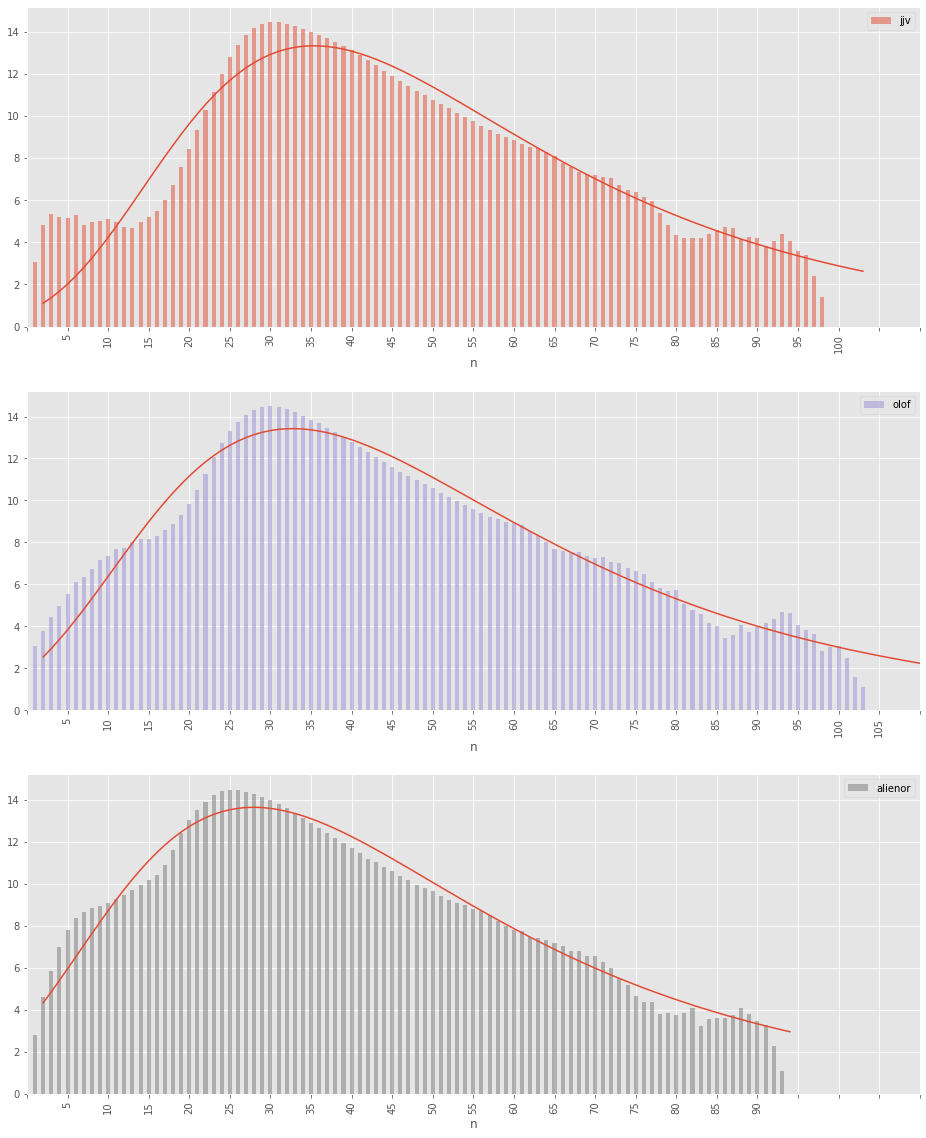

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.optimize import curve_fit
from scipy.special import factorial
from scipy.special import beta
import matplotlib
import matplotlib.pyplot as plt

matplotlib.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (16.0, 20.0)

def z(lamb,nu):
    n, res = 0, 0
    while True:
        term = lamb**n / (factorial(n)**nu)
        if abs((res+term)-res / res) < 0.001 :
             break;
        n,res = n+1, res+term
    return res

def gauss_func(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

def lognorm_func(x, a, x0, sigma):
    return a*np.exp(-(np.log(x)-x0)**2/(2*sigma**2))

def weibull_func(x, a, k, lamda):
    return a * (k/lamda)* (x/lamda)**(k-1) * np.exp(-(x/lamda)**k)

def poisson_func(x, a, lamb):
    return a*(lamb**x/factorial(x))*np.exp(-lamb)

def moyal_func(x, a, x0, scale):
    return a * np.exp( - ((x-x0)/scale + np.exp(-(x-x0)/scale))/2.0) / scale

def frechet_func(x, c, a, scale):
    return a * c * ((x)/scale)**(-c-1) * np.exp(-(((x)/scale)**(-c))) / scale


# Load data
data_full = pd.read_csv('cercles.csv', index_col=0, header=0, squeeze=True)

data_jjv     = data_full.jjv.drop([103,104,105,106,107,108,109])
data_olof    = data_full.olof
data_alienor = data_full.alienor.drop([94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109])

# Choose dataset
data1_nolog = data_jjv
data2_nolog = data_olof
data3_nolog = data_alienor

data1 = np.log(data_jjv)
data2 = np.log(data_olof)
data3 = np.log(data_alienor)

# Plot for comparison
fig, (ax1, ax2, ax3) = plt.subplots(3)

data1.plot(kind='bar', color=list(matplotlib.rcParams['axes.prop_cycle'])[0]['color'], alpha=0.5, legend=True, ax=ax1)
data2.plot(kind='bar', color=list(matplotlib.rcParams['axes.prop_cycle'])[2]['color'], alpha=0.5, legend=True, ax=ax2)
data3.plot(kind='bar', color=list(matplotlib.rcParams['axes.prop_cycle'])[3]['color'], alpha=0.5, legend=True, ax=ax3)

x1  = data1.index.to_numpy()
x2  = data2.index.to_numpy()
x3  = data3.index.to_numpy()
y1 = data1.to_numpy()
y2 = data2.to_numpy()
y3 = data3.to_numpy()

#popt1, pcov1 = curve_fit(frechet_func, x1, y1, p0=[2,3,2])
#popt2, pcov2 = curve_fit(frechet_func, x2, y2, p0=[2,3,2])
#popt3, pcov3 = curve_fit(frechet_func, x3, y3, p0=[2,3,2])

popt1, pcov1 = curve_fit(moyal_func, x1, y1, p0=[2, 2, 5])
popt2, pcov2 = curve_fit(moyal_func, x2, y2, p0=[2, 2, 5])
popt3, pcov3 = curve_fit(moyal_func, x3, y3, p0=[2, 2, 5])

perr1, perr2, perr3 = np.sqrt(np.diag(pcov1)), np.sqrt(np.diag(pcov2)), np.sqrt(np.diag(pcov3))

#ax1.plot(x1,frechet_func(x1, *popt1))
#ax2.plot(x2,frechet_func(x2, *popt2))
#ax3.plot(x3,frechet_func(x3, *popt3))

ax1.plot(x1,moyal_func(x1, *popt1))
ax2.plot(x2,moyal_func(x2, *popt2))
ax3.plot(x3,moyal_func(x3, *popt3))

#ax.set_yscale('log')
#ax.set_ylim(1e-1,1e7)
ax1.xaxis.set_ticks(np.arange(-1, 110, 5))
ax2.xaxis.set_ticks(np.arange(-1, 110, 5))
ax3.xaxis.set_ticks(np.arange(-1, 110, 5))


Distribution de Moyal ( Approximation courante de la distribution de Landau en fait...)

$$f(x) = \frac{1}{\sqrt{2\pi}} e^{-\frac{x + e^{-x}}{2}}$$

Ici on fit ***le log de la distribution*** avec *moyal_func* :
$$g(x,x0,a,b) = \frac{a}{b} f(\frac{x-x_0}{b})$$

Les fits obtenus donnnent :

In [2]:
print('jjv')
print('Estimated [a,x0,b] = ', popt1)
print('1-sigma error on [a,x0,b] = ', perr1)
print('olof')
print('Estimated [a,x0,b] = ', popt2)
print('1-sigma error on [a,x0,b] = ', perr2)
print('alienor')
print('Estimated [a,x0,b] = ',popt3)
print('1-sigma error on [a,x0,b] = ', perr3)

jjv
Estimated [a,x0,b] =  [351.38170275  34.33824002  15.98458543]
1-sigma error on [a,x0,b] =  [6.95196137 0.50036929 0.40538545]
olof
Estimated [a,x0,b] =  [374.66691263  31.73082037  16.93011265]
1-sigma error on [a,x0,b] =  [5.30463096 0.37613239 0.3112082 ]
alienor
Estimated [a,x0,b] =  [368.28433629  26.93055566  16.37113191]
1-sigma error on [a,x0,b] =  [3.85449249 0.25706871 0.22794878]
